In [22]:
# Load the dataset.

import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\ADMIN\Documents\Personal\Naivas\Marley International Store-2015.xlsx'
xls = pd.ExcelFile(file_path)

# Reading the Excel File (Loading the Orders sheet into a DataFrame).
orders_df = pd.read_excel(xls, sheet_name='Orders')


In [23]:
# Inspection of the data.
# Display the first few rows and the columns of the Orders DataFrame.

print(orders_df.head())
print(orders_df.columns)

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

In [24]:
# Convert Order Date to datetime format.
# Convert Dates and Extract Month.

orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['Month'] = orders_df['Order Date'].dt.to_period('M')

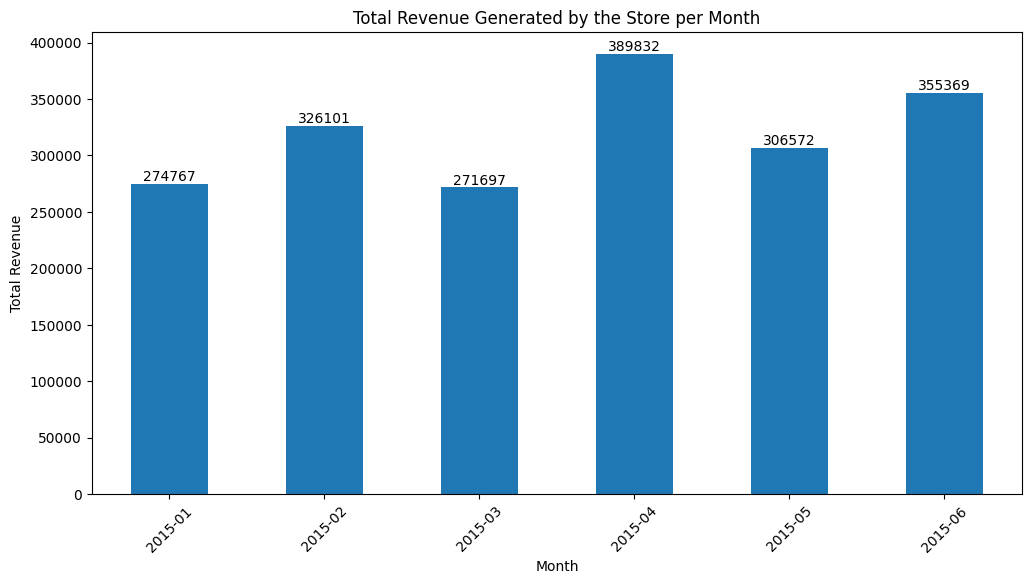

In [52]:
# Question 1. What is the total revenue generated by the store per month?

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
ax = monthly_revenue.plot(kind='bar', title='Total Revenue Generated by the Store per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Annotate the bar chart with the revenue values
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


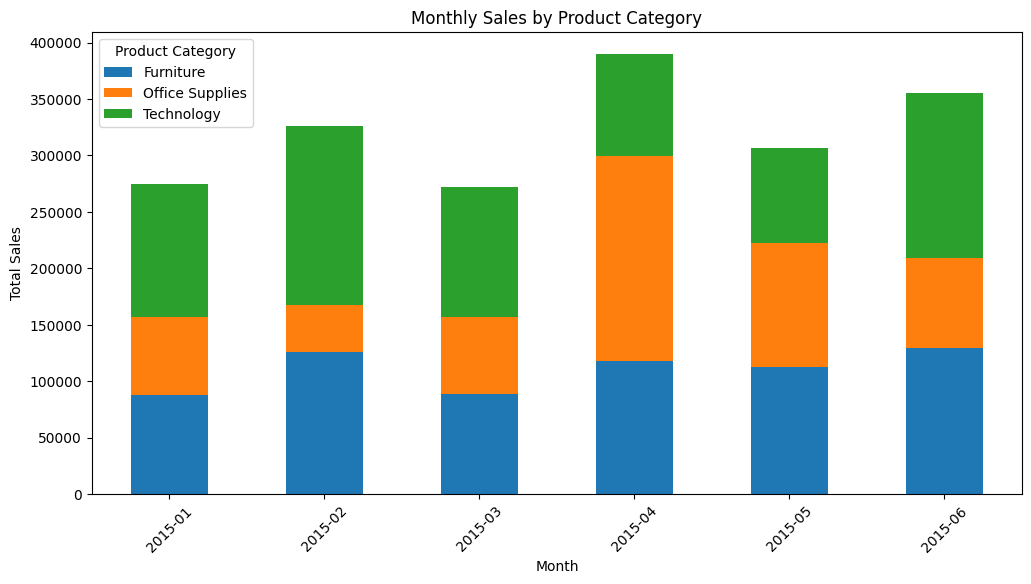

In [26]:
# Question 2. Which category of products contributes the most to sales per month?

category_sales_monthly = orders_df.groupby(['Month', 'Product Category'])['Sales'].sum().unstack()
category_sales_monthly.plot(kind='bar', stacked=True, figsize=(12, 6), title='Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

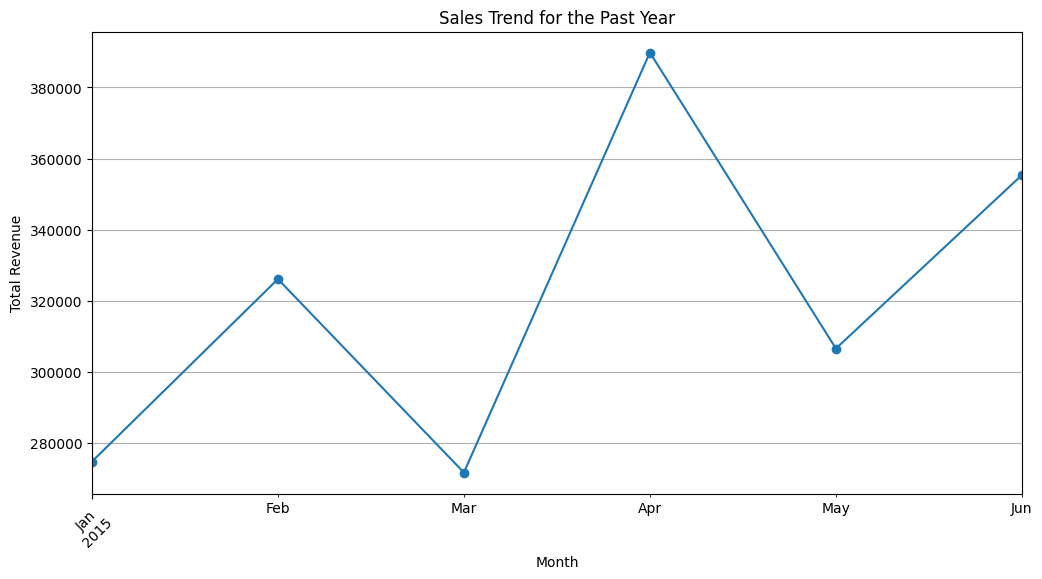

In [27]:
# Question 3. How has the sales trend been for the past year?

monthly_revenue.plot(kind='line', marker='o', figsize=(12, 6), title='Sales Trend for the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

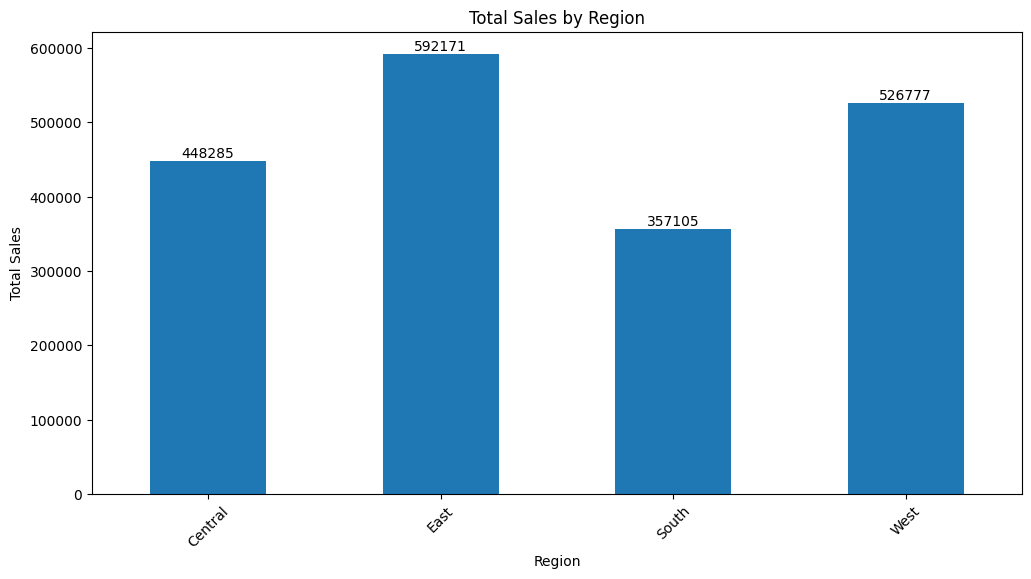

In [49]:
# Question 4. Which region has the highest sales and which one has the lowest?

region_sales = data.groupby('Region')['Sales'].sum()
plt.figure(figsize=(12, 6))
ax = region_sales.plot(kind='bar', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Annotate the bar chart
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


In [29]:
# Question 5. What is the average profit margin of the store?

total_profit = orders_df['Profit'].sum()
total_sales = orders_df['Sales'].sum()
average_profit_margin = (total_profit / total_sales) * 100

print(f'Average Profit Margin: {average_profit_margin:.2f}%')

Average Profit Margin: 11.64%


In [30]:
# Question 6. Which Category is Best Selling and Most Profitable?

category_performance = orders_df.groupby('Product Category')[['Sales', 'Profit']].sum()
best_selling_category = category_performance['Sales'].idxmax()
most_profitable_category = category_performance['Profit'].idxmax()

print(f'Best Selling Category: {best_selling_category}')
print(f'Most Profitable Category: {most_profitable_category}')

Best Selling Category: Technology
Most Profitable Category: Office Supplies


In [31]:
# Question 7. What is the Best Selling and Most Profitable Sub-Category?

subcategory_performance = orders_df.groupby('Product Sub-Category')[['Sales', 'Profit']].sum()
best_selling_subcategory = subcategory_performance['Sales'].idxmax()
most_profitable_subcategory = subcategory_performance['Profit'].idxmax()

print(f'Best Selling Sub-Category: {best_selling_subcategory}')
print(f'Most Profitable Sub-Category: {most_profitable_subcategory}')

Best Selling Sub-Category: Office Machines
Most Profitable Sub-Category: Binders and Binder Accessories


In [32]:
# Question 8. Which is the Top Selling Sub-Category?

top_selling_subcategory = best_selling_subcategory
print(f'Top Selling Sub-Category: {top_selling_subcategory}')

Top Selling Sub-Category: Office Machines


In [33]:
# Question 9. Which Customer Segment is Most Profitable?

segment_profit = orders_df.groupby('Customer Segment')['Profit'].sum()
most_profitable_segment = segment_profit.idxmax()

print(f'Most Profitable Customer Segment: {most_profitable_segment}')

Most Profitable Customer Segment: Small Business


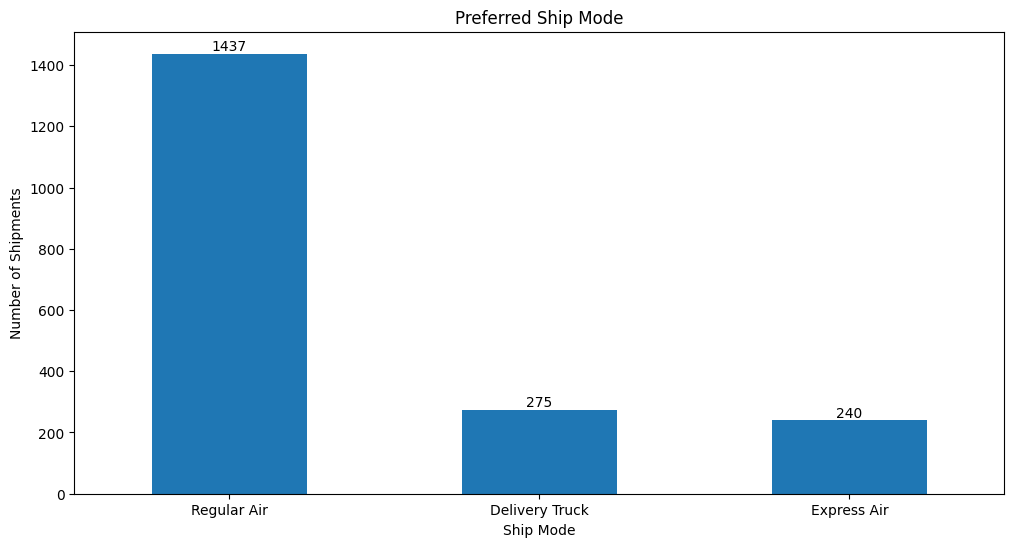

In [48]:
# Question 10. Which is the Preferred Ship Mode?

ship_mode_counts = data['Ship Mode'].value_counts()
plt.figure(figsize=(12, 6))
ax = ship_mode_counts.plot(kind='bar', title='Preferred Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)

# Annotate the bar chart
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


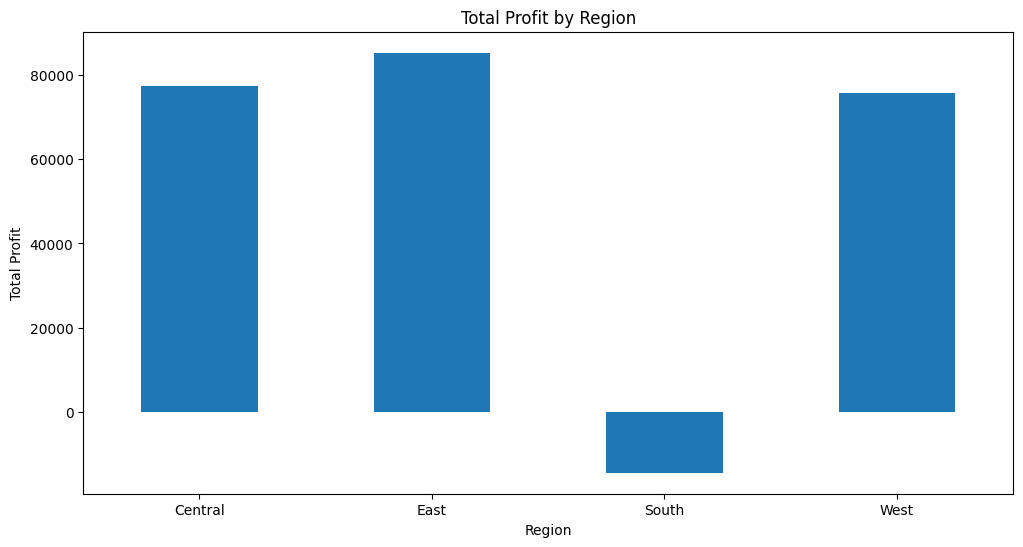

Most Profitable Region: East


In [35]:
# Question 11. Which Region is the Most Profitable?

region_profit = orders_df.groupby('Region')['Profit'].sum()
region_profit.plot(kind='bar', figsize=(12, 6), title='Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()
most_profitable_region = region_profit.idxmax()

print(f'Most Profitable Region: {most_profitable_region}')

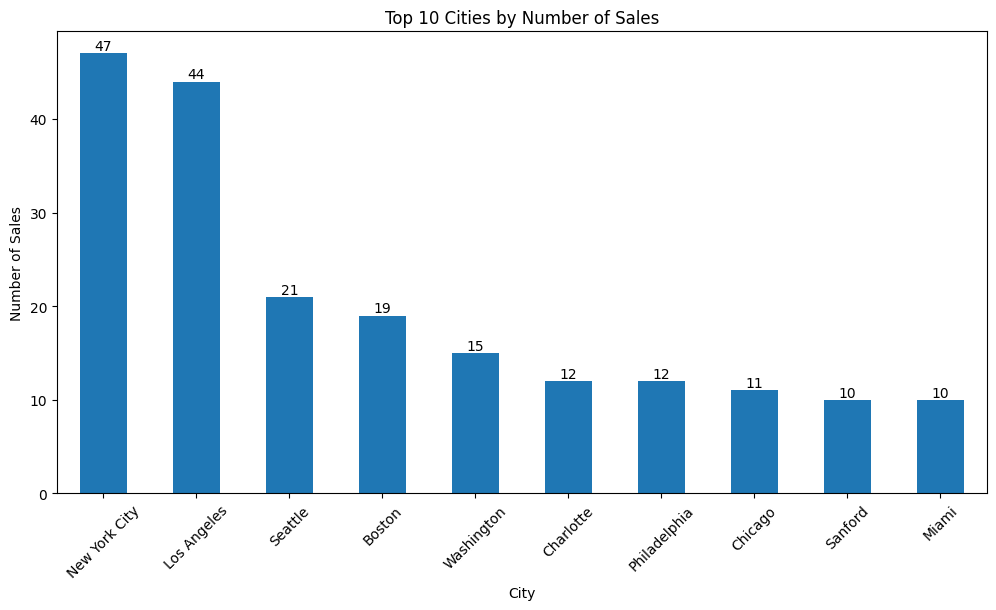

City with the Highest Number of Sales Transactions: New York City


In [41]:
# Question 12. Which City has the Highest Number of Sales?

# Count the number of sales transactions per city
city_sales_count = data['City'].value_counts()

# Plot the top 10 cities by number of sales transactions
plt.figure(figsize=(12, 6))
ax = city_sales_count.head(10).plot(kind='bar', title='Top 10 Cities by Number of Sales')
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)

# Annotate the bar chart with the number of sales
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

# City with the highest number of sales transactions
highest_sales_city = city_sales_count.idxmax()
print(f'City with the Highest Number of Sales Transactions: {highest_sales_city}')
